# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are formed by dividing a dataset into smaller groups based on attributes (such as "Price" or "Mileage"). At each phase, the algorithm selects the best characteristic and split point for separating the data into groups with comparable outcomes. This process is repeated until groups are pure (all cars in a group have the same price) or stopping rules (maximum depth) are met.
2. Trees divide data into rectangular sections, allowing them to detect complex patterns (for example, price spikes for autos with mileage between 50k and 100k). Unlike linear models, which presume straight-line interactions, trees do not require features to interact linearly.
3. Gini calculates how "mixed" categories are in a group. For example, if a node has 90% sedans and 10% SUVs, its Gini value is low. Trees strive for splits that minimize Gini, resulting in purer groups for categorization.
4. Trees overfit by growing excessively deeply (for example, dividing such that each leaf has one vehicle). To prevent this:

Limit tree depth (for example, a maximum of 5 splits). Set a minimum amount of samples per leaf (for example, at least ten cars each group). After training, prune the tree to remove any less critical splits.
5. False. Trees can work with both categorical (e.g., "Fuel_Type") and numerical variables ("Mileage"). Numeric features are separated at thresholds (e.g., "Mileage ≤ 50,000"), and categorical splits are handled naturally.
6. Binary splits maintain the tree's simplicity and efficiency. Multi-way splits (e.g., three branches) complicate the model without considerably boosting accuracy, making interpretation more difficult.
7.

Overfitting: A deep tree with many leaves, small groups (e.g., two vehicles per leaf), good training accuracy, but low test performance.

Underfitting: A shallow tree (e.g., two splits), low accuracy on both training and test data, and failure to detect evident patterns.



**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

Observations: 976, Features: 12
Variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
Train samples: 780 | Test samples: 196
Best min_samples_leaf: 5 (Test R²: 0.7895)
Test R²: 0.7895, Test RMSE: 138562.95


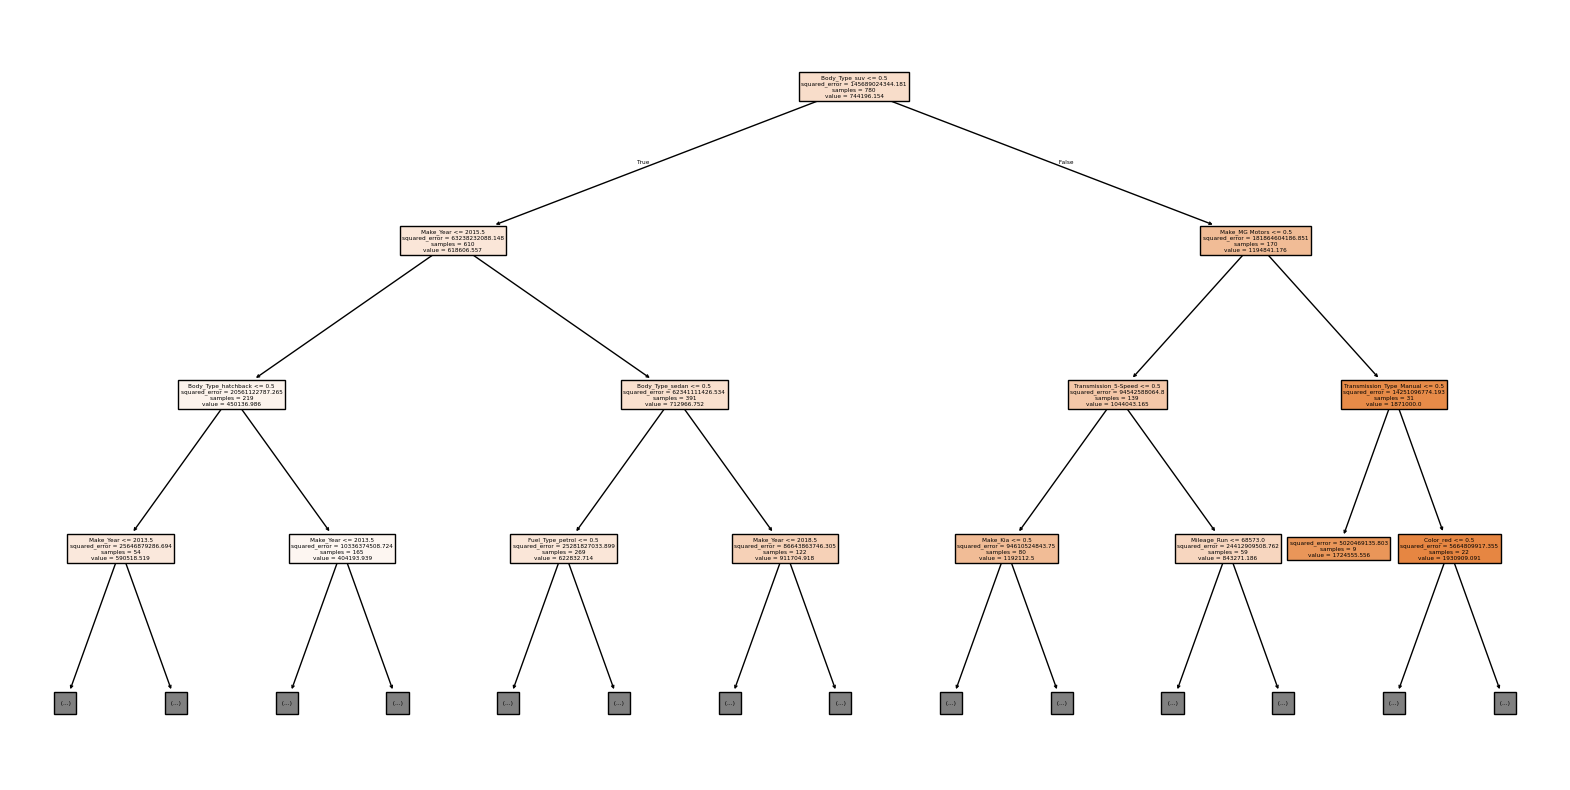

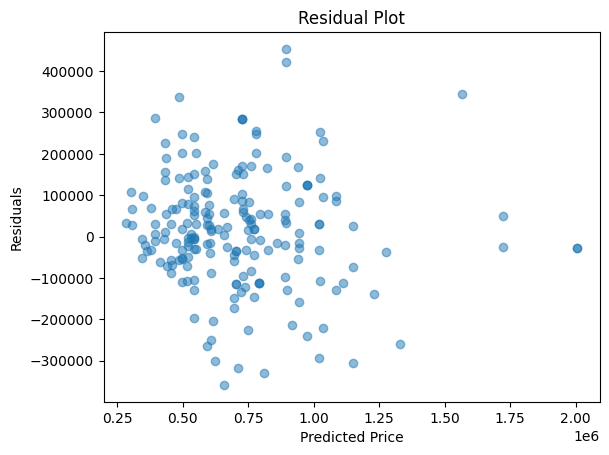

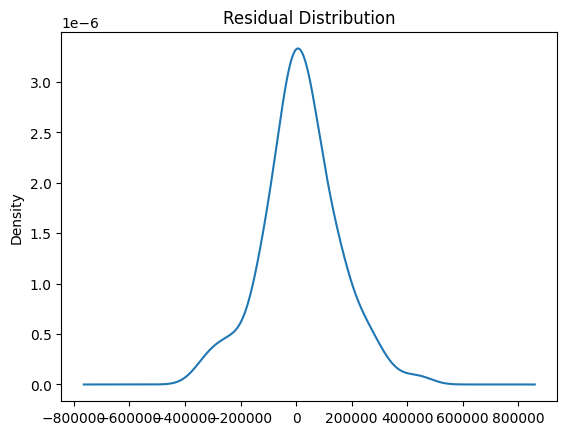

Linear Regression - Test R²: 0.7868, Test RMSE: 139445.51


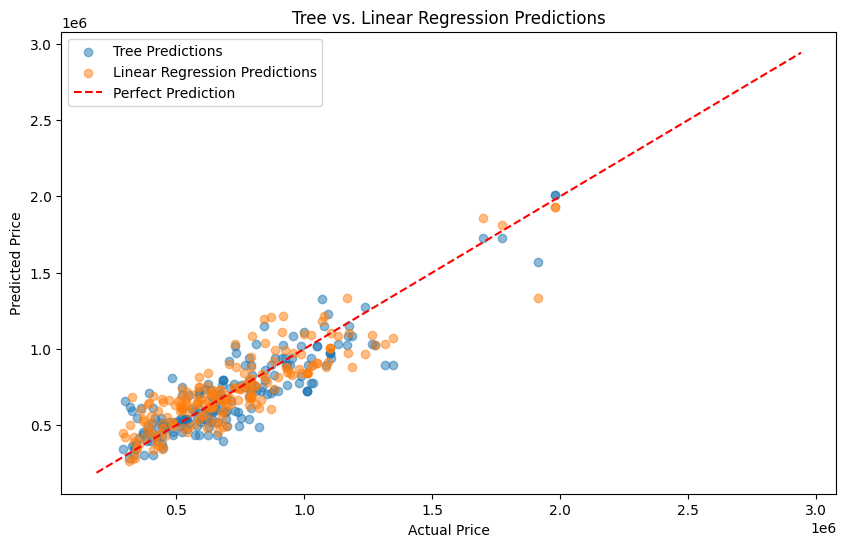

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

df = pd.read_csv('cars_hw.csv')

print(f"Observations: {df.shape[0]}, Features: {df.shape[1]}")
print("Variables:", df.columns.tolist())

# Display first 3 rows
df.head(3)

# Clean 'No_of_Owners'
df['No_of_Owners'] = df['No_of_Owners'].str.replace(r'st|nd|rd|th', '', regex=True).astype(int)

numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
categorical_vars = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Remove index column
df_encoded = df_encoded.drop(columns=['Unnamed: 0'])

# Split data
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

print(f"Train samples: {X_train.shape[0]} | Test samples: {X_test.shape[0]}")

# 3
best_r2 = -float('inf')
best_leaf = None

for leaf_size in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=31)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_leaf = leaf_size

print(f"Best min_samples_leaf: {best_leaf} (Test R²: {best_r2:.4f})")

#4
# Train model with best leaf size
best_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=31)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test R²: {best_r2:.4f}, Test RMSE: {rmse:.2f}")

# Plot partial tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, max_depth=3, feature_names=X.columns, filled=True)
plt.show()

# Residuals analysis
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Kernel density of residuals
pd.Series(residuals).plot(kind='density')
plt.title("Residual Distribution")
plt.show()

#5
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - Test R²: {r2_lr:.4f}, Test RMSE: {rmse_lr:.2f}")
# The regression tree outperforms linear regression because it captures non-linear relationships (e.g., interactions between mileage and car age) that linear models miss.

# 6
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Tree Predictions')
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Tree vs. Linear Regression Predictions")
plt.legend()
plt.show()
# Tree predictions (blue) cluster closer to the diagonal, showing better accuracy.
# Linear regression (orange) has more dispersion, especially at higher prices.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?